## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

print("Libraries imported successfully yay!")

Libraries imported successfully yay!


## 2. Initial Dataset Understanding

### 2.1 Read dataset

In [4]:
df = pd.read_csv('./data/diabetes_binary_health_indicators_BRFSS2015.csv')

### 2.2. Basic Dataset Information

In [109]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,Female,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,Female,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,Female,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,Female,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,Female,11,5,4


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df['Age']=df['Age'].astype('int64')
df['Education']=df['Education'].astype('int64')
df['Income']=df['Income'].astype('int64')
df['BMI']=df['BMI'].astype('int64')
df['CholCheck']=df['CholCheck'].astype('int64')
df['Smoker']=df['Smoker'].astype('int64')
df['Stroke']=df['Stroke'].astype('int64')
df['HeartDiseaseorAttack']=df['HeartDiseaseorAttack'].astype('int64')
df['PhysActivity']=df['PhysActivity'].astype('int64')
df['Fruits']=df['Fruits'].astype('int64')
df['Veggies']=df['Veggies'].astype('int64')
df['HvyAlcoholConsump']=df['HvyAlcoholConsump'].astype('int64')
df['AnyHealthcare']=df['AnyHealthcare'].astype('int64')
df['NoDocbcCost']=df['NoDocbcCost'].astype('int64')
df['GenHlth']=df['GenHlth'].astype('int64')
df['MentHlth']=df['MentHlth'].astype('int64')
df['PhysHlth']=df['PhysHlth'].astype('int64')
df['DiffWalk']=df['DiffWalk'].astype('int64')
df['Sex']=df['Sex'].astype('int64')
df['Diabetes_binary']=df['Diabetes_binary'].astype('int64')
df['HighBP']=df['HighBP'].astype('int64')
df['HighChol']=df['HighChol'].astype('int64')

In [ ]:
df.columns

In [ ]:
df.describe().T

### 2.3 Data Cleaning

In [6]:
# Check for missing data
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [120]:
# Check for duplicated data
df.duplicated().sum()

24206

In [7]:
# Remove duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
# Get number of rows x columns
df.shape

In [8]:
# Rename columns for better understanding
df = df.rename(columns={'Diabetes_binary': 'Diabetes'})

## 2.3 EDA - Exploratory Data Analysis

### 2.3.1 Target Distribution across the dataset

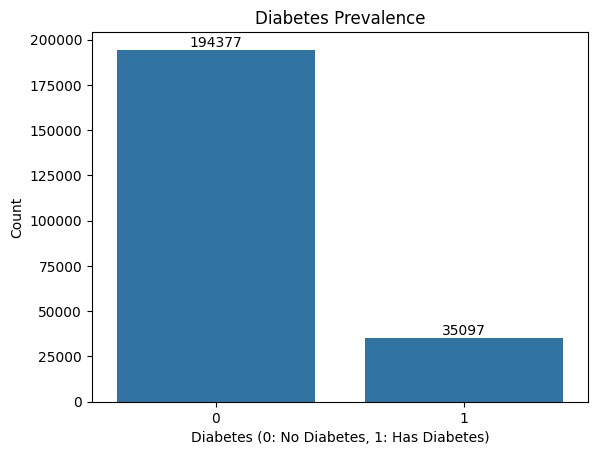

In [123]:
sns.countplot(x='Diabetes', data=df)
plt.title('Diabetes Prevalence')
plt.xlabel('Diabetes (0: No Diabetes, 1: Has Diabetes)')
plt.ylabel('Count')

for bar in plt.gca().containers:
    plt.gca().bar_label(bar)
plt.show()

### 2.3.2 Diabetes Prevalence by Gender

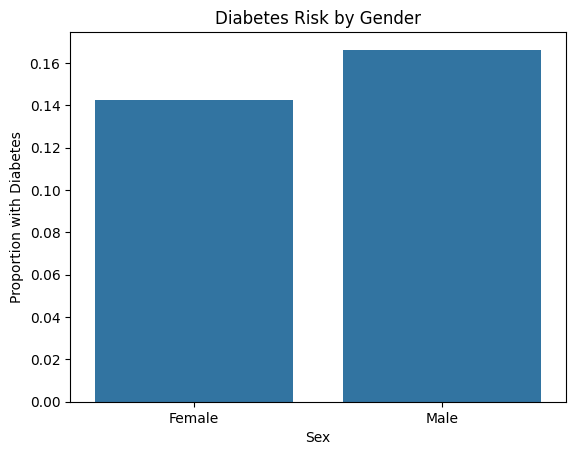

In [125]:
df_plot = df.copy()
df_plot['Sex'] = df_plot['Sex'].replace({1: 'Male', 0: 'Female'})

sns.barplot(x='Sex', y='Diabetes', data=df_plot, errorbar=None)
plt.title('Diabetes Risk by Gender')
plt.ylabel('Proportion with Diabetes')
plt.show()


### 2.3.3 Diabetes Prevalence by Age Categories

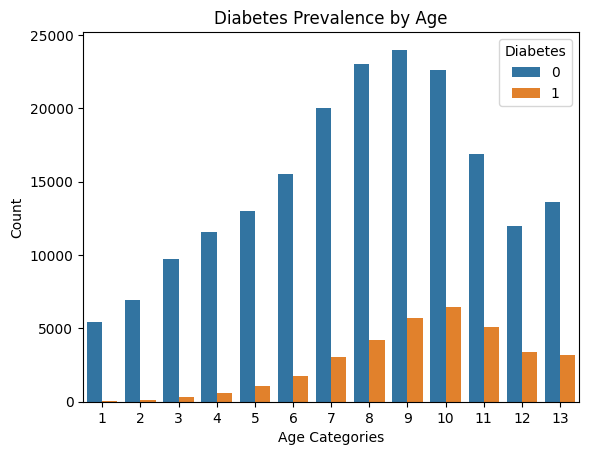

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 6483 people.


In [126]:
# Age Categories Mapping
age_category_map = {
    1: '18-24', 
    2: '25-29', 
    3: '30-34', 
    4: '35-39', 
    5: '40-44',
    6: '45-49', 
    7: '50-54', 
    8: '55-59', 
    9: '60-64', 
    10: '65-69', 
    11: '70-74', 
    12: '75-79', 
    13: '80+'
}

# Countplot 
sns.countplot(x='Age', hue='Diabetes', data=df, order=range(1, 14))
plt.title('Diabetes Prevalence by Age')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

# Consider only people with diabetes (Diabetes = 1)
df_diabetes = df[df['Diabetes'] == 1]

# Calculate the total count per age category
age_category_count_diabetes = df_diabetes['Age'].value_counts().sort_index()

# Find the age category with the highest count for people with diabetes
max_age_category_diabetes = age_category_count_diabetes.idxmax()
max_count_diabetes = age_category_count_diabetes.max()

max_age_group_diabetes = age_category_map[max_age_category_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_diabetes} ({max_age_group_diabetes} years old) with a total of {max_count_diabetes} people.")


### 2.3.4 Diabetes Prevalence in Males

In [ ]:
# Data for males with diabetes
df_males = df[(df['Sex'] == 1)]

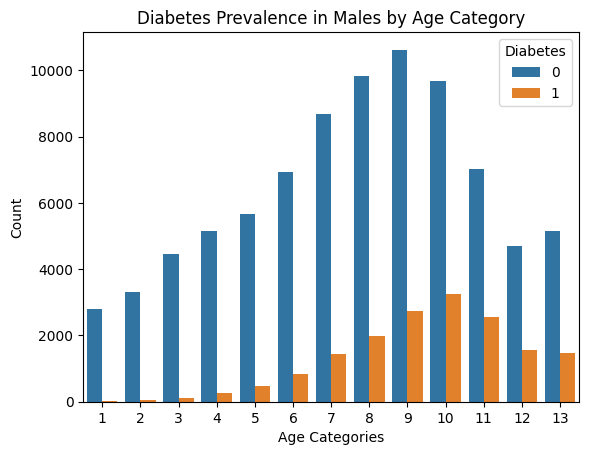

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 3263 people.


In [132]:
# Countplot 
sns.countplot(x='Age', hue='Diabetes', data=df_males, order=range(1, 14))
plt.title('Diabetes Prevalence in Males by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

df_males_diabetes = df_males[df_males['Diabetes'] == 1]

age_category_count_male_diabetes = df_males_diabetes['Age'].value_counts().sort_index()

max_age_category_male_diabetes = age_category_count_male_diabetes.idxmax()
max_count_male_diabetes = age_category_count_male_diabetes.max()

max_age_group_male_diabetes = age_category_map[max_age_category_male_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_male_diabetes} ({max_age_group_male_diabetes} years old) with a total of {max_count_male_diabetes} people.")

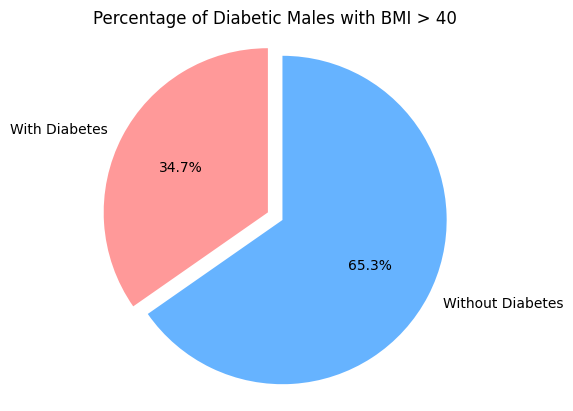

Percentage diabetic males with BMI > 40: 34.7%


In [148]:
df_males_bmi_above_40 = df[(df['Sex'] == 1) & (df['BMI'] > 40)]

# Calculate the count of males with diabetes (Diabetes == 1) and without diabetes (Diabetes == 0)
diabetes_count = df_males_bmi_above_40['Diabetes'].value_counts()

# Calculate the percentage of males with BMI > 40 who have diabetes
diabetes_percentage = (diabetes_count.get(1, 0) / len(df_males_bmi_above_40)) * 100
no_diabetes_percentage = 100 - diabetes_percentage

# Create a pie chart (circle plot)
labels = ['With Diabetes', 'Without Diabetes']
sizes = [diabetes_percentage, no_diabetes_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetic Males with BMI > 40')
plt.axis('equal')  
plt.show()

print(f"Percentage diabetic males with BMI > 40: {diabetes_percentage:.1f}%")

### 2.3.5 Diabetes Prevalence in Females

In [133]:
# Stats for females with diabetes
df_females = df[(df['Sex'] == 0)]

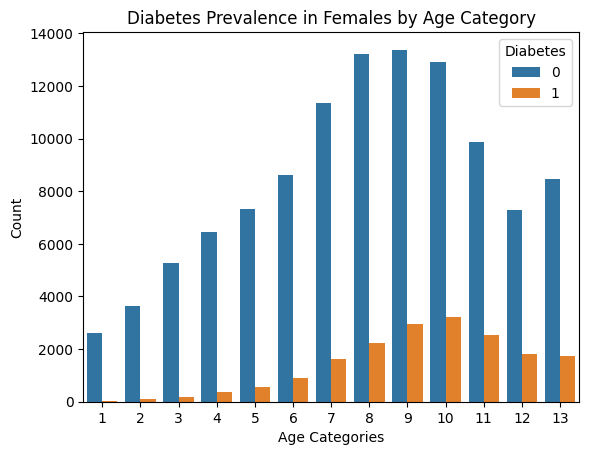

Age category with the highest number of people with diabetes: 10 (65-69 years old) with a total of 3220 people.


In [135]:
# Countplot 
sns.countplot(x='Age', hue='Diabetes', data=df_females, order=range(1, 14))
plt.title('Diabetes Prevalence in Females by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.show()

df_females_diabetes = df_females[df_females['Diabetes'] == 1]

age_category_count_female_diabetes = df_females_diabetes['Age'].value_counts().sort_index()

max_age_category_female_diabetes = age_category_count_female_diabetes.idxmax()
max_count_female_diabetes = age_category_count_female_diabetes.max()

max_age_group_female_diabetes = age_category_map[max_age_category_female_diabetes]

print(f"Age category with the highest number of people with diabetes: {max_age_category_female_diabetes} ({max_age_group_female_diabetes} years old) with a total of {max_count_female_diabetes} people.")

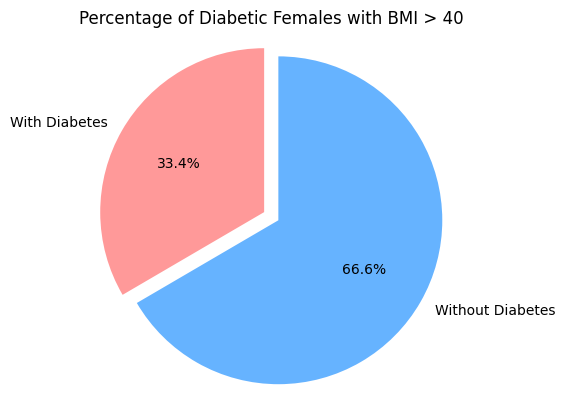

Percentage of diabetics in females with BMI > 40: 33.4%


In [ ]:
df_females_bmi_above_40 = df[(df['Sex'] == 0) & (df['BMI'] > 40)]

# Calculate the count of females with diabetes (Diabetes == 1) and without diabetes (Diabetes == 0)
diabetes_count = df_females_bmi_above_40['Diabetes'].value_counts()

# Calculate the percentage of females with BMI > 40 who have diabetes
diabetes_percentage = (diabetes_count.get(1, 0) / len(df_females_bmi_above_40)) * 100
no_diabetes_percentage = 100 - diabetes_percentage

# Create a pie chart (circle plot)
labels = ['With Diabetes', 'Without Diabetes']
sizes = [diabetes_percentage, no_diabetes_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetic Females with BMI > 40')
plt.axis('equal')  
plt.show()

print(f"Percentage diabetic females with BMI > 40: {diabetes_percentage:.1f}%")

### 2.3.6 Diabetes and Risk Factors Analysis

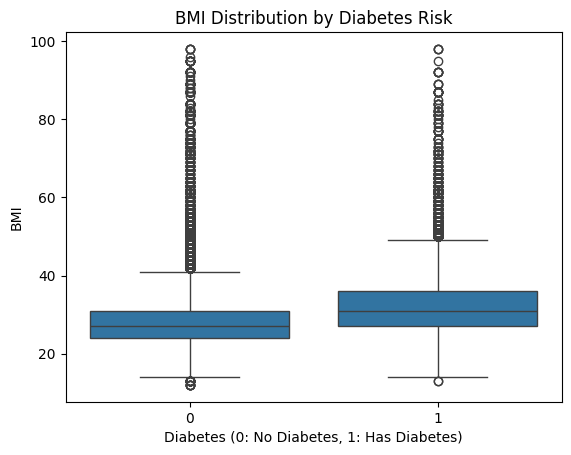

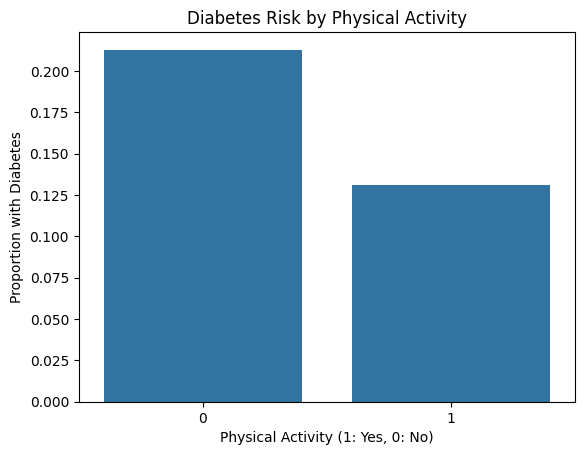

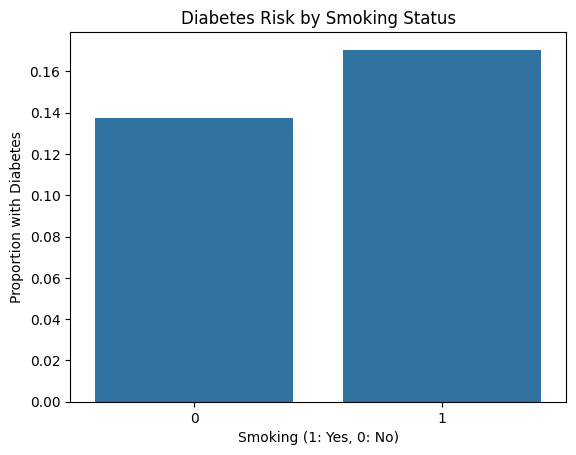

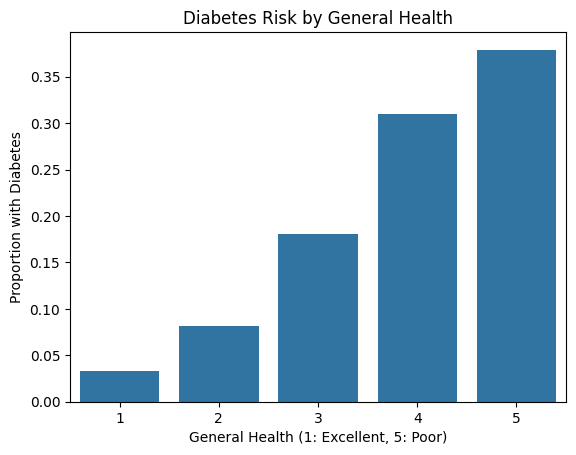

In [100]:
# BMI Analysis
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Risk')
plt.xlabel('Diabetes (0: No Diabetes, 1: Has Diabetes)')
plt.ylabel('BMI')
plt.show()

# Impact of Physical Activity and Diabetes
sns.barplot(x='PhysActivity', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by Physical Activity')
plt.xlabel('Physical Activity (1: Yes, 0: No)')
plt.ylabel('Proportion with Diabetes')
plt.show()

# Impact of Smoking and Diabetes 
sns.barplot(x='Smoker', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by Smoking Status')
plt.xlabel('Smoking (1: Yes, 0: No)')
plt.ylabel('Proportion with Diabetes')
plt.show()

# Impact of General Health Status and Diabetes
sns.barplot(x='GenHlth', y='Diabetes', data=df, errorbar=None)
plt.title('Diabetes Risk by General Health')
plt.xlabel('General Health (1: Excellent, 5: Poor)')
plt.ylabel('Proportion with Diabetes')
plt.show()


### 2.3. Correlation Analysis

#### 2.3.1 HeatMap

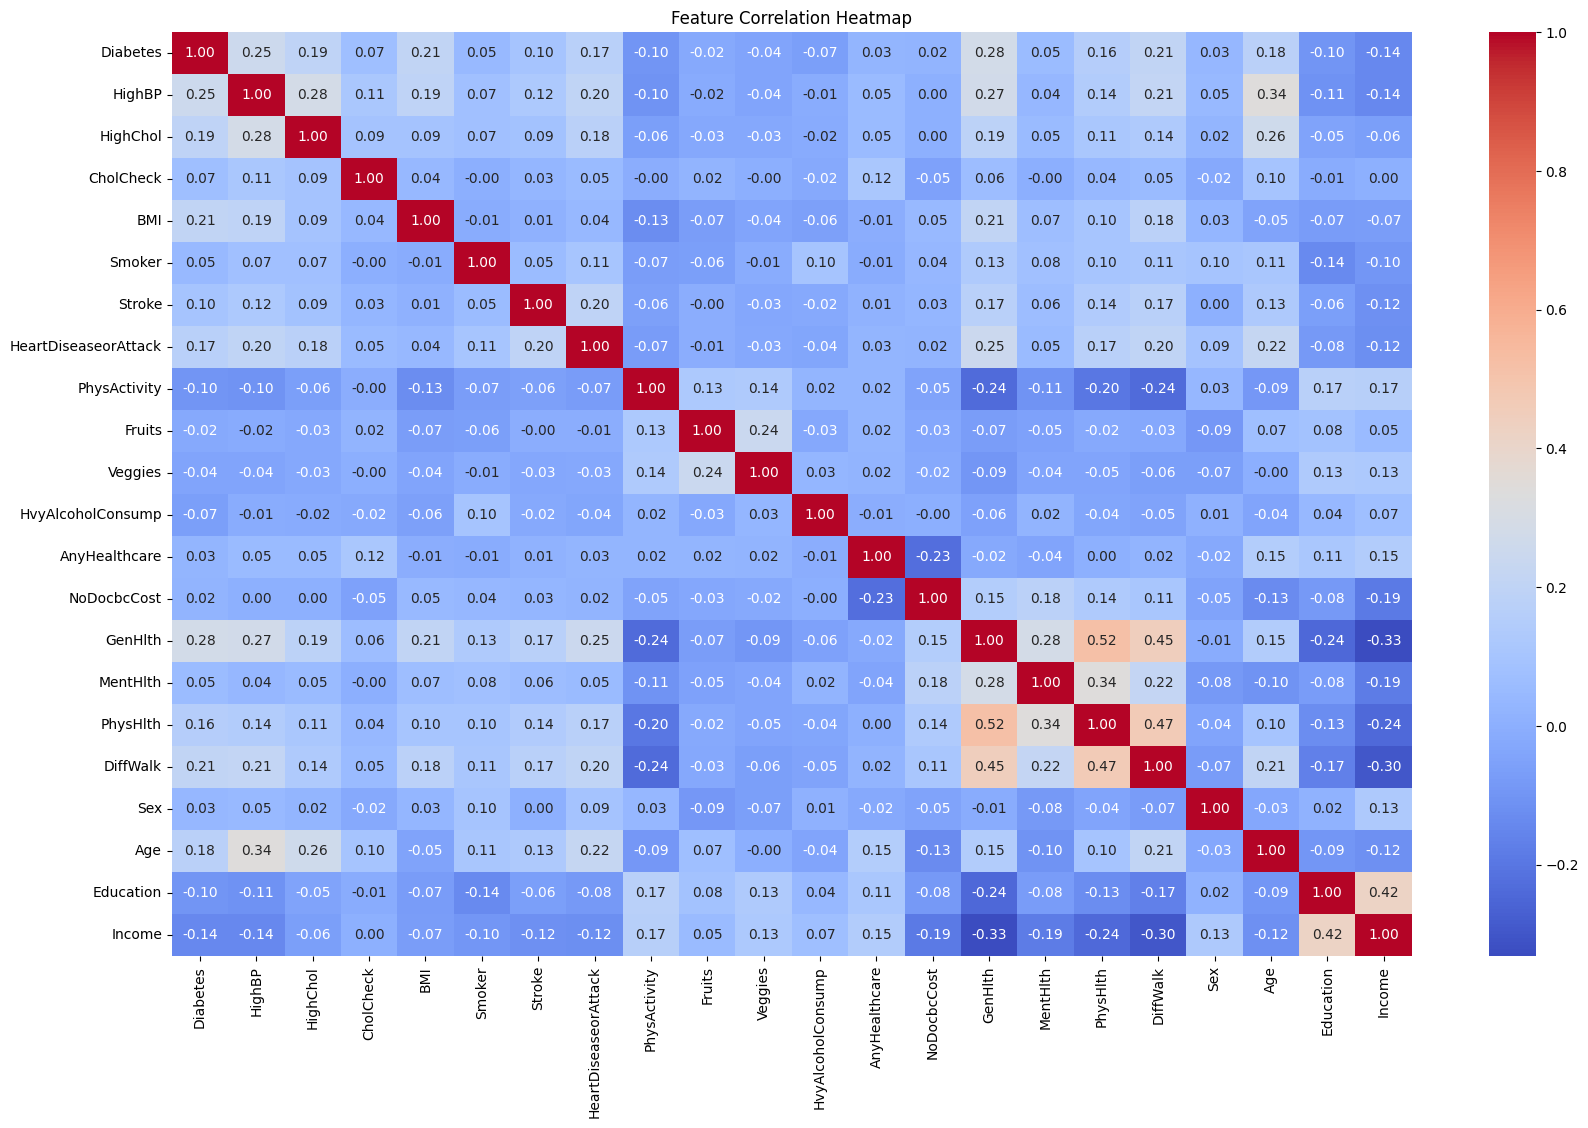

In [98]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

#### 2.3.1 Correlation of Features with Target Variable

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

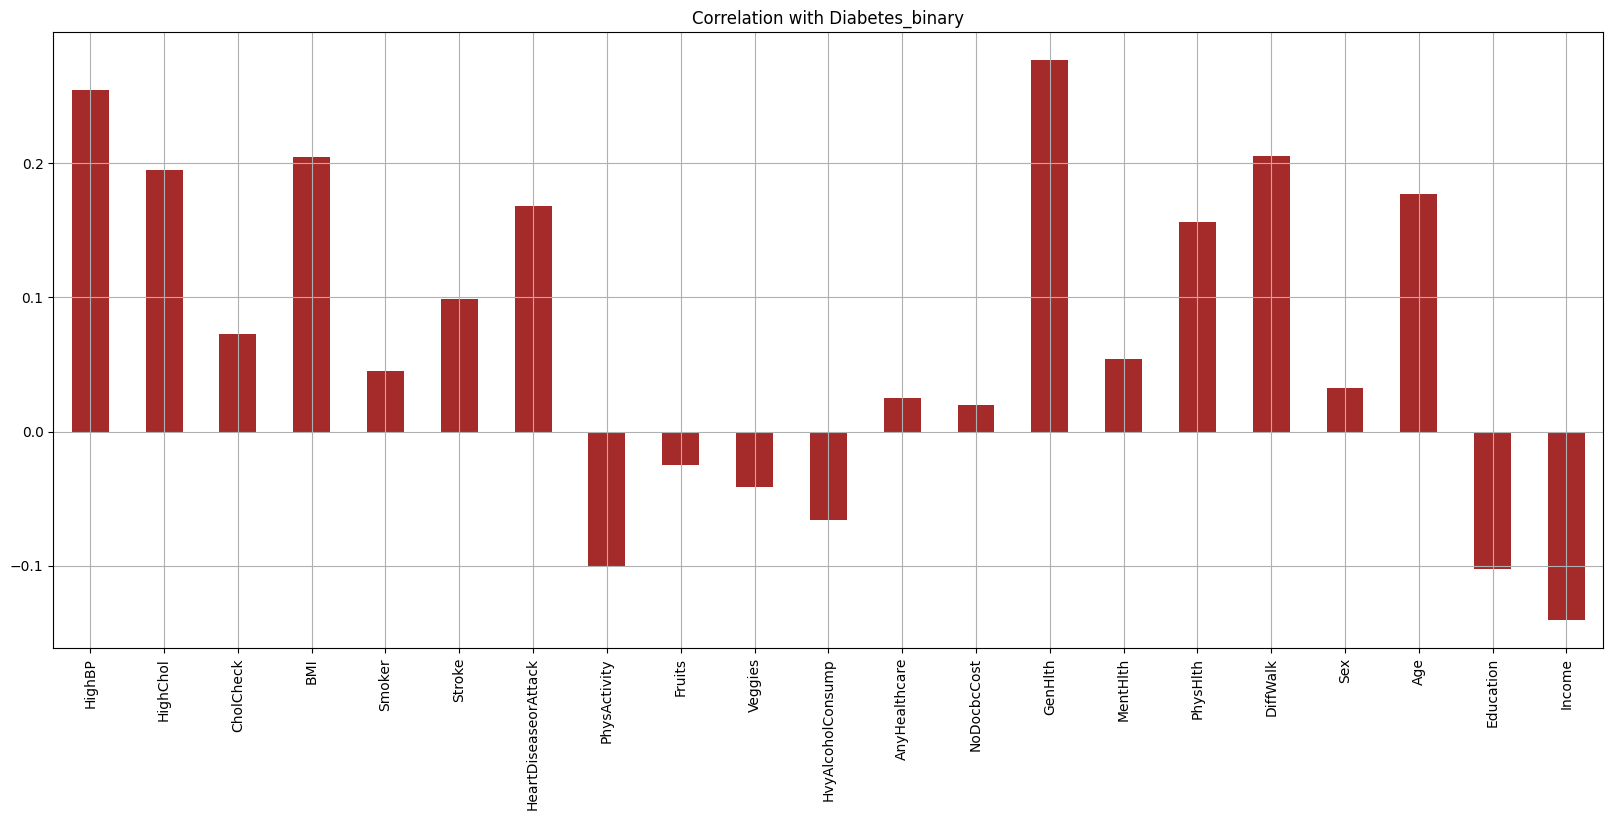

In [104]:
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', 
                                                                     grid=True, 
                                                                     figsize=(20, 8), 
                                                                     title="Correlation with Diabetes_binary",
                                                                     color="Brown")



##### High Correlated Features

In [151]:
high_corr = df.corr()
high_corr_features = high_corr.index[(high_corr["Diabetes"]) >= 0.2]
high_corr_features

Index(['Diabetes', 'HighBP', 'BMI', 'GenHlth', 'DiffWalk'], dtype='object')

##### Low Correlated Features

In [152]:
low_corr = df.corr()
low_corr_features = low_corr.index[(low_corr["Diabetes"]) < 0.0]
low_corr_features

Index(['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Education',
       'Income'],
      dtype='object')

## 3. Data Preprocessing

### 3.1 Feature Selection

In [9]:
# Dropping low correlated features

low_corr = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Education', 'Income']
df.drop(low_corr , axis= 1 ,inplace=True)

### 3.2 Data Splitting for Training and Testing

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 4. Machine Learning Algorithms

### 4.1 Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [12]:
lr_pred = lr.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.2f}")

print(confusion_matrix(y_test, lr_pred))

print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.85
[[38009   829]
 [ 6053  1004]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     38838
           1       0.55      0.14      0.23      7057

    accuracy                           0.85     45895
   macro avg       0.71      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895



### 4.2 Random Forest

In [21]:
# Basic Model
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# Model with the best parameters
rf_best = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

rf_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

Improved Random Forest Accuracy: 0.8518

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     38838
           1       0.57      0.14      0.23      7057

    accuracy                           0.85     45895
   macro avg       0.72      0.56      0.57     45895
weighted avg       0.82      0.85      0.81     45895



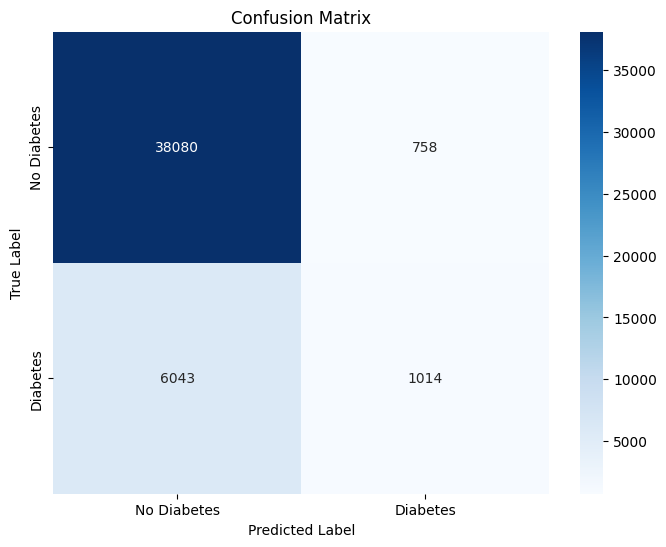

In [28]:
from sklearn.metrics import confusion_matrix

# Best Model Used
rf_best_pred = rf_best.predict(X_test)

# Evaluate performance
print(f"Improved Random Forest Accuracy: {accuracy_score(y_test, rf_best_pred):.4f}")

print("\nClassification Report:\n", classification_report(y_test, rf_best_pred))

cm = confusion_matrix(y_test, rf_best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a model instance
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Results after 36m
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
# Best Accuracy: 0.8526193096561485


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  21.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  38.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.5s
[CV] END max_dep

### 4.3 Decision Tree

In [175]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_pred = dt.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")

print(confusion_matrix(y_test, dt_pred))

print(classification_report(y_test, dt_pred))

KNN Accuracy: 0.80
[[34999  3976]
 [ 5033  1887]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     38975
           1       0.32      0.27      0.30      6920

    accuracy                           0.80     45895
   macro avg       0.60      0.59      0.59     45895
weighted avg       0.79      0.80      0.80     45895



### 4.4 KNeighborsClassifier Model (KNN)

In [173]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [174]:
knn_pred = rf.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.2f}")

print(confusion_matrix(y_test, knn_pred))

print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.84
[[37059  1916]
 [ 5474  1446]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     38975
           1       0.43      0.21      0.28      6920

    accuracy                           0.84     45895
   macro avg       0.65      0.58      0.60     45895
weighted avg       0.80      0.84      0.81     45895



### 4.5 Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

In [ ]:
svm_pred = rf.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.2f}")

print(confusion_matrix(y_test, svm_pred))

print(classification_report(y_test, svm_pred))

### 4.6 AdaBoost Classifier

In [13]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
adaboost_pred = adaboost.predict(X_test)

print(f"AdaBoost Accuracy: {accuracy_score(y_test, adaboost_pred):.2f}")

print(confusion_matrix(y_test, adaboost_pred))

print(classification_report(y_test, adaboost_pred))

KNN Accuracy: 0.85
[[37896   942]
 [ 5861  1196]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     38838
           1       0.56      0.17      0.26      7057

    accuracy                           0.85     45895
   macro avg       0.71      0.57      0.59     45895
weighted avg       0.82      0.85      0.82     45895



### 4.7 Gradient Boosting Classifier

In [16]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [17]:
gb_pred = gb.predict(X_test)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")

print(confusion_matrix(y_test, gb_pred))

print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.85
[[38035   803]
 [ 5930  1127]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     38838
           1       0.58      0.16      0.25      7057

    accuracy                           0.85     45895
   macro avg       0.72      0.57      0.58     45895
weighted avg       0.82      0.85      0.82     45895



### 4.8 XGBoost

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# metrics...

### 4.9 Naive Bayes

In [18]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [19]:
nb_pred = nb.predict(X_test)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, nb_pred):.2f}")

print(confusion_matrix(y_test, nb_pred))

print(classification_report(y_test, nb_pred))


Gradient Boosting Accuracy: 0.76
[[31303  7535]
 [ 3306  3751]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     38838
           1       0.33      0.53      0.41      7057

    accuracy                           0.76     45895
   macro avg       0.62      0.67      0.63     45895
weighted avg       0.82      0.76      0.78     45895



## 5. Conclusion